# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 11223 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=2)


  0% (    1 of 11223) |           | Elapsed Time: 0:00:34 ETA:  4 days, 12:07:49

  0% (   54 of 11223) |                    | Elapsed Time: 0:00:35 ETA:  0:02:57

  0% (  108 of 11223) |                    | Elapsed Time: 0:00:36 ETA:  0:02:54

  1% (  141 of 11223) |                    | Elapsed Time: 0:00:37 ETA:  0:02:55

  1% (  188 of 11223) |                    | Elapsed Time: 0:00:38 ETA:  0:03:00

  2% (  240 of 11223) |                    | Elapsed Time: 0:00:39 ETA:  0:02:59

  2% (  281 of 11223) |                    | Elapsed Time: 0:00:40 ETA:  0:02:59

  2% (  334 of 11223) |                    | Elapsed Time: 0:00:41 ETA:  0:02:57

  3% (  389 of 11223) |                    | Elapsed Time: 0:00:42 ETA:  0:02:54

  3% (  421 of 11223) |                    | Elapsed Time: 0:00:42 ETA:  0:02:53

  4% (  473 of 11223) |                    | Elapsed Time: 0:00:43 ETA:  0:02:53

  4% (  525 of 11223) |                    | Elapsed Time: 0:00:44 ETA:  0:02:53

  5% (  562 of 11223) |#                   | Elapsed Time: 0:00:45 ETA:  0:02:52

  5% (  612 of 11223) |#                   | Elapsed Time: 0:00:46 ETA:  0:02:50

  5% (  665 of 11223) |#                   | Elapsed Time: 0:00:47 ETA:  0:02:49

  6% (  702 of 11223) |#                   | Elapsed Time: 0:00:48 ETA:  0:02:48

  6% (  753 of 11223) |#                   | Elapsed Time: 0:00:49 ETA:  0:02:48

  7% (  803 of 11223) |#                   | Elapsed Time: 0:00:50 ETA:  0:02:50

  7% (  842 of 11223) |#                   | Elapsed Time: 0:00:51 ETA:  0:02:50

  7% (  893 of 11223) |#                   | Elapsed Time: 0:00:52 ETA:  0:02:49

  8% (  943 of 11223) |#                   | Elapsed Time: 0:00:53 ETA:  0:02:50

  8% (  983 of 11223) |#                   | Elapsed Time: 0:00:53 ETA:  0:02:49

  9% ( 1037 of 11223) |#                   | Elapsed Time: 0:00:54 ETA:  0:02:45

  9% ( 1088 of 11223) |#                   | Elapsed Time: 0:00:55 ETA:  0:02:46

 10% ( 1123 of 11223) |##                  | Elapsed Time: 0:00:56 ETA:  0:02:45

 10% ( 1173 of 11223) |##                  | Elapsed Time: 0:00:57 ETA:  0:02:44

 10% ( 1224 of 11223) |##                  | Elapsed Time: 0:00:58 ETA:  0:02:43

 11% ( 1263 of 11223) |##                  | Elapsed Time: 0:00:59 ETA:  0:02:40

 11% ( 1313 of 11223) |##                  | Elapsed Time: 0:01:00 ETA:  0:02:39

 12% ( 1361 of 11223) |##                  | Elapsed Time: 0:01:01 ETA:  0:02:40

 12% ( 1403 of 11223) |##                  | Elapsed Time: 0:01:02 ETA:  0:02:39

 12% ( 1453 of 11223) |##                  | Elapsed Time: 0:01:03 ETA:  0:02:40

 13% ( 1505 of 11223) |##                  | Elapsed Time: 0:01:04 ETA:  0:02:38

 13% ( 1544 of 11223) |##                  | Elapsed Time: 0:01:05 ETA:  0:02:38

 14% ( 1599 of 11223) |##                  | Elapsed Time: 0:01:06 ETA:  0:02:35

 14% ( 1653 of 11223) |##                  | Elapsed Time: 0:01:07 ETA:  0:02:32

 15% ( 1684 of 11223) |###                 | Elapsed Time: 0:01:07 ETA:  0:02:33

 15% ( 1732 of 11223) |###                 | Elapsed Time: 0:01:08 ETA:  0:02:33

 15% ( 1785 of 11223) |###                 | Elapsed Time: 0:01:09 ETA:  0:02:29

 16% ( 1824 of 11223) |###                 | Elapsed Time: 0:01:10 ETA:  0:02:28

 16% ( 1872 of 11223) |###                 | Elapsed Time: 0:01:11 ETA:  0:02:28

 17% ( 1926 of 11223) |###                 | Elapsed Time: 0:01:12 ETA:  0:02:26

 17% ( 1965 of 11223) |###                 | Elapsed Time: 0:01:13 ETA:  0:02:23

 17% ( 1975 of 11223) |###                 | Elapsed Time: 0:01:14 ETA:  0:02:57

 18% ( 2024 of 11223) |###                 | Elapsed Time: 0:01:15 ETA:  0:02:59

 18% ( 2069 of 11223) |###                 | Elapsed Time: 0:01:16 ETA:  0:03:00

 18% ( 2105 of 11223) |###                 | Elapsed Time: 0:01:17 ETA:  0:02:59

 19% ( 2154 of 11223) |###                 | Elapsed Time: 0:01:18 ETA:  0:03:00

 19% ( 2203 of 11223) |###                 | Elapsed Time: 0:01:19 ETA:  0:03:00

 20% ( 2245 of 11223) |####                | Elapsed Time: 0:01:20 ETA:  0:02:59

 20% ( 2298 of 11223) |####                | Elapsed Time: 0:01:21 ETA:  0:02:59

 20% ( 2353 of 11223) |####                | Elapsed Time: 0:01:22 ETA:  0:02:55

 21% ( 2385 of 11223) |####                | Elapsed Time: 0:01:22 ETA:  0:02:22

 21% ( 2436 of 11223) |####                | Elapsed Time: 0:01:23 ETA:  0:02:21

 22% ( 2487 of 11223) |####                | Elapsed Time: 0:01:24 ETA:  0:02:16

 22% ( 2526 of 11223) |####                | Elapsed Time: 0:01:25 ETA:  0:02:15

 23% ( 2585 of 11223) |####                | Elapsed Time: 0:01:26 ETA:  0:02:09

 23% ( 2640 of 11223) |####                | Elapsed Time: 0:01:27 ETA:  0:02:05

 23% ( 2666 of 11223) |####                | Elapsed Time: 0:01:27 ETA:  0:02:01

 24% ( 2717 of 11223) |####                | Elapsed Time: 0:01:28 ETA:  0:02:01

 24% ( 2768 of 11223) |####                | Elapsed Time: 0:01:29 ETA:  0:02:02

 25% ( 2806 of 11223) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:03

 25% ( 2859 of 11223) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:01

 25% ( 2912 of 11223) |#####               | Elapsed Time: 0:01:32 ETA:  0:01:59

 26% ( 2947 of 11223) |#####               | Elapsed Time: 0:01:33 ETA:  0:01:59

 26% ( 2993 of 11223) |#####               | Elapsed Time: 0:01:34 ETA:  0:02:05

 27% ( 3046 of 11223) |#####               | Elapsed Time: 0:01:35 ETA:  0:02:05

 27% ( 3087 of 11223) |#####               | Elapsed Time: 0:01:36 ETA:  0:02:06

 27% ( 3138 of 11223) |#####               | Elapsed Time: 0:01:37 ETA:  0:02:05

 28% ( 3189 of 11223) |#####               | Elapsed Time: 0:01:38 ETA:  0:02:04

 28% ( 3227 of 11223) |#####               | Elapsed Time: 0:01:38 ETA:  0:02:01

 29% ( 3284 of 11223) |#####               | Elapsed Time: 0:01:40 ETA:  0:01:58

 29% ( 3337 of 11223) |#####               | Elapsed Time: 0:01:41 ETA:  0:01:56

 30% ( 3367 of 11223) |######              | Elapsed Time: 0:01:41 ETA:  0:01:56

 30% ( 3418 of 11223) |######              | Elapsed Time: 0:01:42 ETA:  0:01:53

 30% ( 3468 of 11223) |######              | Elapsed Time: 0:01:43 ETA:  0:01:53

 31% ( 3508 of 11223) |######              | Elapsed Time: 0:01:44 ETA:  0:01:54

 31% ( 3560 of 11223) |######              | Elapsed Time: 0:01:45 ETA:  0:01:52

 32% ( 3614 of 11223) |######              | Elapsed Time: 0:01:46 ETA:  0:01:49

 32% ( 3648 of 11223) |######              | Elapsed Time: 0:01:47 ETA:  0:01:51

 32% ( 3697 of 11223) |######              | Elapsed Time: 0:01:48 ETA:  0:01:54

 33% ( 3747 of 11223) |######              | Elapsed Time: 0:01:49 ETA:  0:01:55

 33% ( 3788 of 11223) |######              | Elapsed Time: 0:01:49 ETA:  0:01:53

 34% ( 3844 of 11223) |######              | Elapsed Time: 0:01:51 ETA:  0:01:50

 34% ( 3898 of 11223) |######              | Elapsed Time: 0:01:52 ETA:  0:01:47

 35% ( 3929 of 11223) |#######             | Elapsed Time: 0:01:52 ETA:  0:01:45

 35% ( 3980 of 11223) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:44

 35% ( 4036 of 11223) |#######             | Elapsed Time: 0:01:54 ETA:  0:01:42

 36% ( 4069 of 11223) |#######             | Elapsed Time: 0:01:55 ETA:  0:01:39

 36% ( 4122 of 11223) |#######             | Elapsed Time: 0:01:56 ETA:  0:01:36

 37% ( 4172 of 11223) |#######             | Elapsed Time: 0:01:57 ETA:  0:01:35

 37% ( 4209 of 11223) |#######             | Elapsed Time: 0:01:58 ETA:  0:01:35

 37% ( 4258 of 11223) |#######             | Elapsed Time: 0:01:59 ETA:  0:01:38

 38% ( 4311 of 11223) |#######             | Elapsed Time: 0:02:00 ETA:  0:01:37

 38% ( 4349 of 11223) |#######             | Elapsed Time: 0:02:00 ETA:  0:01:35

 39% ( 4400 of 11223) |#######             | Elapsed Time: 0:02:01 ETA:  0:01:35

 39% ( 4451 of 11223) |#######             | Elapsed Time: 0:02:02 ETA:  0:01:36

 40% ( 4490 of 11223) |########            | Elapsed Time: 0:02:03 ETA:  0:01:36

 40% ( 4547 of 11223) |########            | Elapsed Time: 0:02:04 ETA:  0:01:33

 40% ( 4600 of 11223) |########            | Elapsed Time: 0:02:05 ETA:  0:01:31

 41% ( 4630 of 11223) |########            | Elapsed Time: 0:02:06 ETA:  0:01:29

 41% ( 4687 of 11223) |########            | Elapsed Time: 0:02:07 ETA:  0:01:24

 42% ( 4739 of 11223) |########            | Elapsed Time: 0:02:08 ETA:  0:01:23

 42% ( 4770 of 11223) |########            | Elapsed Time: 0:02:08 ETA:  0:01:23

 42% ( 4825 of 11223) |########            | Elapsed Time: 0:02:09 ETA:  0:01:20

 43% ( 4878 of 11223) |########            | Elapsed Time: 0:02:10 ETA:  0:01:18

 43% ( 4911 of 11223) |########            | Elapsed Time: 0:02:11 ETA:  0:01:15

 44% ( 4964 of 11223) |########            | Elapsed Time: 0:02:12 ETA:  0:01:16

 44% ( 5015 of 11223) |########            | Elapsed Time: 0:02:13 ETA:  0:01:17

 45% ( 5051 of 11223) |#########           | Elapsed Time: 0:02:14 ETA:  0:01:19

 45% ( 5100 of 11223) |#########           | Elapsed Time: 0:02:15 ETA:  0:01:22

 45% ( 5152 of 11223) |#########           | Elapsed Time: 0:02:16 ETA:  0:01:21

 46% ( 5191 of 11223) |#########           | Elapsed Time: 0:02:16 ETA:  0:01:19

 46% ( 5247 of 11223) |#########           | Elapsed Time: 0:02:17 ETA:  0:01:18

 46% ( 5251 of 11223) |#########           | Elapsed Time: 0:02:19 ETA:  0:02:00

 47% ( 5303 of 11223) |#########           | Elapsed Time: 0:02:20 ETA:  0:01:59

 47% ( 5331 of 11223) |#########           | Elapsed Time: 0:02:20 ETA:  0:02:02

 47% ( 5375 of 11223) |#########           | Elapsed Time: 0:02:21 ETA:  0:02:06

 48% ( 5426 of 11223) |#########           | Elapsed Time: 0:02:22 ETA:  0:02:01

 48% ( 5472 of 11223) |#########           | Elapsed Time: 0:02:23 ETA:  0:01:59

 49% ( 5523 of 11223) |#########           | Elapsed Time: 0:02:24 ETA:  0:01:59

 49% ( 5574 of 11223) |#########           | Elapsed Time: 0:02:25 ETA:  0:01:58

 50% ( 5612 of 11223) |##########          | Elapsed Time: 0:02:26 ETA:  0:02:02

 50% ( 5663 of 11223) |##########          | Elapsed Time: 0:02:27 ETA:  0:01:16

 50% ( 5715 of 11223) |##########          | Elapsed Time: 0:02:28 ETA:  0:01:15

 51% ( 5752 of 11223) |##########          | Elapsed Time: 0:02:29 ETA:  0:01:14

 51% ( 5803 of 11223) |##########          | Elapsed Time: 0:02:30 ETA:  0:01:09

 52% ( 5854 of 11223) |##########          | Elapsed Time: 0:02:31 ETA:  0:01:09

 52% ( 5893 of 11223) |##########          | Elapsed Time: 0:02:32 ETA:  0:01:06

 52% ( 5942 of 11223) |##########          | Elapsed Time: 0:02:33 ETA:  0:01:06

 53% ( 5991 of 11223) |##########          | Elapsed Time: 0:02:34 ETA:  0:01:06

 53% ( 6033 of 11223) |##########          | Elapsed Time: 0:02:34 ETA:  0:01:05

 54% ( 6083 of 11223) |##########          | Elapsed Time: 0:02:35 ETA:  0:01:05

 54% ( 6135 of 11223) |##########          | Elapsed Time: 0:02:36 ETA:  0:01:04

 55% ( 6173 of 11223) |###########         | Elapsed Time: 0:02:37 ETA:  0:01:04

 55% ( 6220 of 11223) |###########         | Elapsed Time: 0:02:38 ETA:  0:01:05

 55% ( 6272 of 11223) |###########         | Elapsed Time: 0:02:39 ETA:  0:01:03

 56% ( 6313 of 11223) |###########         | Elapsed Time: 0:02:40 ETA:  0:01:05

 56% ( 6366 of 11223) |###########         | Elapsed Time: 0:02:41 ETA:  0:01:01

 57% ( 6417 of 11223) |###########         | Elapsed Time: 0:02:42 ETA:  0:00:59

 57% ( 6454 of 11223) |###########         | Elapsed Time: 0:02:43 ETA:  0:00:59

 57% ( 6507 of 11223) |###########         | Elapsed Time: 0:02:44 ETA:  0:00:56

 58% ( 6558 of 11223) |###########         | Elapsed Time: 0:02:45 ETA:  0:00:55

 58% ( 6594 of 11223) |###########         | Elapsed Time: 0:02:45 ETA:  0:00:55

 59% ( 6643 of 11223) |###########         | Elapsed Time: 0:02:46 ETA:  0:00:53

 59% ( 6690 of 11223) |###########         | Elapsed Time: 0:02:47 ETA:  0:00:54

 60% ( 6734 of 11223) |############        | Elapsed Time: 0:02:48 ETA:  0:00:52

 60% ( 6785 of 11223) |############        | Elapsed Time: 0:02:49 ETA:  0:00:53

 60% ( 6833 of 11223) |############        | Elapsed Time: 0:02:50 ETA:  0:00:53

 61% ( 6875 of 11223) |############        | Elapsed Time: 0:02:51 ETA:  0:00:54

 61% ( 6925 of 11223) |############        | Elapsed Time: 0:02:52 ETA:  0:00:55

 62% ( 6975 of 11223) |############        | Elapsed Time: 0:02:53 ETA:  0:00:54

 62% ( 7015 of 11223) |############        | Elapsed Time: 0:02:54 ETA:  0:00:53

 62% ( 7067 of 11223) |############        | Elapsed Time: 0:02:55 ETA:  0:00:50

 63% ( 7122 of 11223) |############        | Elapsed Time: 0:02:56 ETA:  0:00:45

 63% ( 7155 of 11223) |############        | Elapsed Time: 0:02:57 ETA:  0:00:44

 64% ( 7209 of 11223) |############        | Elapsed Time: 0:02:58 ETA:  0:00:41

 64% ( 7256 of 11223) |############        | Elapsed Time: 0:02:59 ETA:  0:00:40

 65% ( 7295 of 11223) |#############       | Elapsed Time: 0:02:59 ETA:  0:00:40

 65% ( 7351 of 11223) |#############       | Elapsed Time: 0:03:00 ETA:  0:00:36

 65% ( 7401 of 11223) |#############       | Elapsed Time: 0:03:01 ETA:  0:00:35

 66% ( 7436 of 11223) |#############       | Elapsed Time: 0:03:02 ETA:  0:00:34

 66% ( 7492 of 11223) |#############       | Elapsed Time: 0:03:03 ETA:  0:00:31

 67% ( 7546 of 11223) |#############       | Elapsed Time: 0:03:04 ETA:  0:00:31

 67% ( 7576 of 11223) |#############       | Elapsed Time: 0:03:05 ETA:  0:00:34

 67% ( 7628 of 11223) |#############       | Elapsed Time: 0:03:06 ETA:  0:00:33

 68% ( 7679 of 11223) |#############       | Elapsed Time: 0:03:07 ETA:  0:00:31

 68% ( 7716 of 11223) |#############       | Elapsed Time: 0:03:08 ETA:  0:00:28

 69% ( 7770 of 11223) |#############       | Elapsed Time: 0:03:09 ETA:  0:00:28

 69% ( 7821 of 11223) |#############       | Elapsed Time: 0:03:10 ETA:  0:00:26

 70% ( 7857 of 11223) |##############      | Elapsed Time: 0:03:10 ETA:  0:00:26

 70% ( 7910 of 11223) |##############      | Elapsed Time: 0:03:11 ETA:  0:00:26

 70% ( 7958 of 11223) |##############      | Elapsed Time: 0:03:12 ETA:  0:00:28

 71% ( 7997 of 11223) |##############      | Elapsed Time: 0:03:13 ETA:  0:00:26

 71% ( 8048 of 11223) |##############      | Elapsed Time: 0:03:14 ETA:  0:00:26

 72% ( 8100 of 11223) |##############      | Elapsed Time: 0:03:15 ETA:  0:00:24

 72% ( 8137 of 11223) |##############      | Elapsed Time: 0:03:16 ETA:  0:00:24

 72% ( 8189 of 11223) |##############      | Elapsed Time: 0:03:17 ETA:  0:00:24

 73% ( 8244 of 11223) |##############      | Elapsed Time: 0:03:18 ETA:  0:00:21

 73% ( 8277 of 11223) |##############      | Elapsed Time: 0:03:19 ETA:  0:00:21

 74% ( 8333 of 11223) |##############      | Elapsed Time: 0:03:20 ETA:  0:00:18

 74% ( 8385 of 11223) |##############      | Elapsed Time: 0:03:21 ETA:  0:00:15

 75% ( 8418 of 11223) |###############     | Elapsed Time: 0:03:21 ETA:  0:00:12

 75% ( 8473 of 11223) |###############     | Elapsed Time: 0:03:22 ETA:  0:00:09

 75% ( 8524 of 11223) |###############     | Elapsed Time: 0:03:23 ETA:  0:00:08

 76% ( 8558 of 11223) |###############     | Elapsed Time: 0:03:24 ETA:  0:00:10

 76% ( 8612 of 11223) |###############     | Elapsed Time: 0:03:25 ETA:  0:00:08

 77% ( 8664 of 11223) |###############     | Elapsed Time: 0:03:26 ETA:  0:00:09

 77% ( 8698 of 11223) |###############     | Elapsed Time: 0:03:27 ETA:  0:00:06

 78% ( 8756 of 11223) |###############     | Elapsed Time: 0:03:28 ETA:  0:00:04

 78% ( 8814 of 11223) |###############     | Elapsed Time: 0:03:29 ETA:  0:00:00

 78% ( 8839 of 11223) |###############     | Elapsed Time: 0:03:29 ETA:  0:00:02

 79% ( 8891 of 11223) |###############     | Elapsed Time: 0:03:30 ETA:  0:00:02

 79% ( 8945 of 11223) |###############     | Elapsed Time: 0:03:31 ETA:  0:00:00

 80% ( 8979 of 11223) |################    | Elapsed Time: 0:03:32 ETA:  0:00:00

 80% ( 9035 of 11223) |################    | Elapsed Time: 0:03:33 ETA:  0:00:00

 80% ( 9088 of 11223) |################    | Elapsed Time: 0:03:34 ETA:  0:00:00

 81% ( 9119 of 11223) |################    | Elapsed Time: 0:03:34 ETA:  0:00:00

 81% ( 9169 of 11223) |################    | Elapsed Time: 0:03:35 ETA:  0:00:00

 82% ( 9227 of 11223) |################    | Elapsed Time: 0:03:36 ETA:  0:00:00

 82% ( 9259 of 11223) |################    | Elapsed Time: 0:03:37 ETA:  0:00:00

 82% ( 9277 of 11223) |################    | Elapsed Time: 0:03:39 ETA:  0:00:41

 83% ( 9325 of 11223) |################    | Elapsed Time: 0:03:40 ETA:  0:00:44

 83% ( 9374 of 11223) |################    | Elapsed Time: 0:03:41 ETA:  0:00:44

 83% ( 9400 of 11223) |################    | Elapsed Time: 0:03:42 ETA:  0:00:52

 84% ( 9446 of 11223) |################    | Elapsed Time: 0:03:43 ETA:  0:00:56

 84% ( 9498 of 11223) |################    | Elapsed Time: 0:03:44 ETA:  0:00:53

 85% ( 9540 of 11223) |#################   | Elapsed Time: 0:03:44 ETA:  0:00:52

 85% ( 9589 of 11223) |#################   | Elapsed Time: 0:03:45 ETA:  0:00:58

 85% ( 9639 of 11223) |#################   | Elapsed Time: 0:03:46 ETA:  0:00:56

 86% ( 9680 of 11223) |#################   | Elapsed Time: 0:03:47 ETA:  0:00:00

 86% ( 9733 of 11223) |#################   | Elapsed Time: 0:03:48 ETA:  0:00:00

 87% ( 9782 of 11223) |#################   | Elapsed Time: 0:03:49 ETA:  0:00:00

 87% ( 9821 of 11223) |#################   | Elapsed Time: 0:03:50 ETA:  0:00:00

 87% ( 9872 of 11223) |#################   | Elapsed Time: 0:03:51 ETA:  0:00:00

 88% ( 9925 of 11223) |#################   | Elapsed Time: 0:03:52 ETA:  0:00:00

 88% ( 9961 of 11223) |#################   | Elapsed Time: 0:03:53 ETA:  0:00:00

 89% (10017 of 11223) |#################   | Elapsed Time: 0:03:54 ETA:  0:00:00

 89% (10071 of 11223) |#################   | Elapsed Time: 0:03:55 ETA:  0:00:00

 90% (10101 of 11223) |##################  | Elapsed Time: 0:03:55 ETA:  0:00:00

 90% (10153 of 11223) |##################  | Elapsed Time: 0:03:56 ETA:  0:00:00

 90% (10209 of 11223) |##################  | Elapsed Time: 0:03:57 ETA:  0:00:00

 91% (10241 of 11223) |##################  | Elapsed Time: 0:03:58 ETA:  0:00:00

 91% (10293 of 11223) |##################  | Elapsed Time: 0:03:59 ETA:  0:00:00

 92% (10342 of 11223) |##################  | Elapsed Time: 0:04:00 ETA:  0:00:00

 92% (10382 of 11223) |##################  | Elapsed Time: 0:04:01 ETA:  0:00:00

 92% (10432 of 11223) |##################  | Elapsed Time: 0:04:02 ETA:  0:00:00

 93% (10482 of 11223) |##################  | Elapsed Time: 0:04:03 ETA:  0:00:00

 93% (10522 of 11223) |##################  | Elapsed Time: 0:04:04 ETA:  0:00:00

 94% (10570 of 11223) |##################  | Elapsed Time: 0:04:05 ETA:  0:00:00

 94% (10622 of 11223) |##################  | Elapsed Time: 0:04:06 ETA:  0:00:00

 95% (10662 of 11223) |################### | Elapsed Time: 0:04:06 ETA:  0:00:00

 95% (10713 of 11223) |################### | Elapsed Time: 0:04:07 ETA:  0:00:00

 95% (10762 of 11223) |################### | Elapsed Time: 0:04:08 ETA:  0:00:00

 96% (10803 of 11223) |################### | Elapsed Time: 0:04:09 ETA:  0:00:00

 96% (10852 of 11223) |################### | Elapsed Time: 0:04:10 ETA:  0:00:00

 97% (10902 of 11223) |################### | Elapsed Time: 0:04:11 ETA:  0:00:00

 97% (10943 of 11223) |################### | Elapsed Time: 0:04:12 ETA:  0:00:00

 97% (10997 of 11223) |################### | Elapsed Time: 0:04:13 ETA:  0:00:00

 98% (11051 of 11223) |################### | Elapsed Time: 0:04:14 ETA:  0:00:00

 98% (11083 of 11223) |################### | Elapsed Time: 0:04:15 ETA:  0:00:00

 99% (11134 of 11223) |################### | Elapsed Time: 0:04:16 ETA:  0:00:00

 99% (11185 of 11223) |################### | Elapsed Time: 0:04:17 ETA:  0:00:00

100% (11223 of 11223) |####################| Elapsed Time: 0:04:17 Time: 0:04:17


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

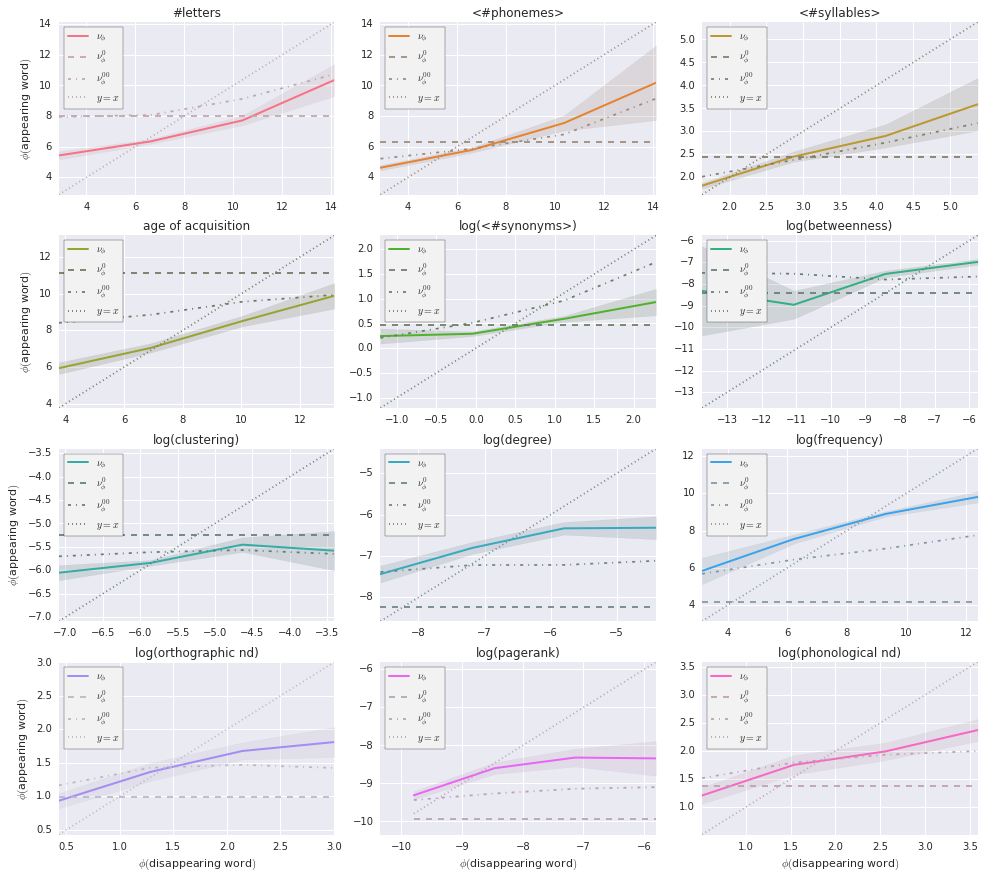

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

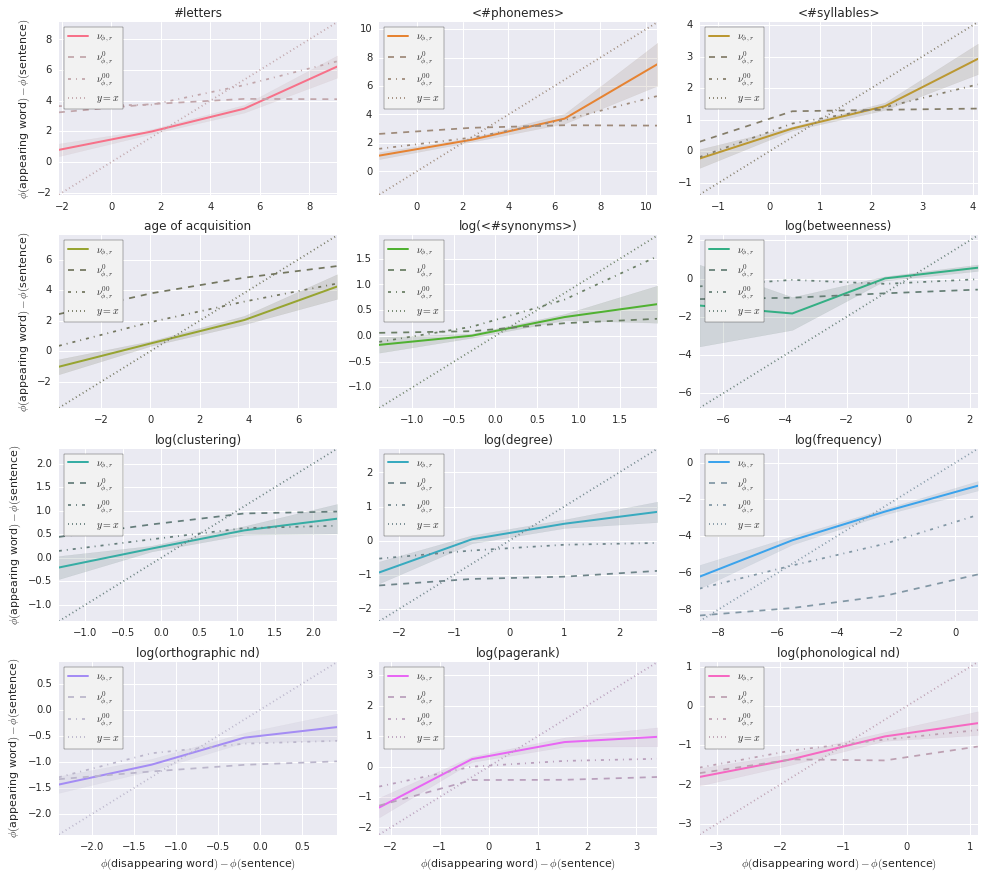

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

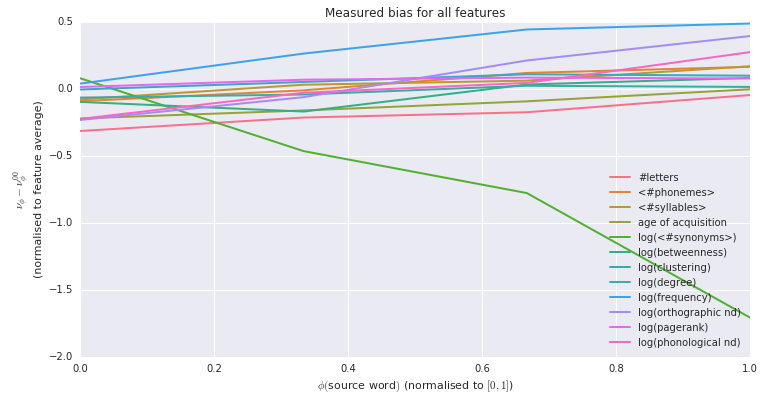

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

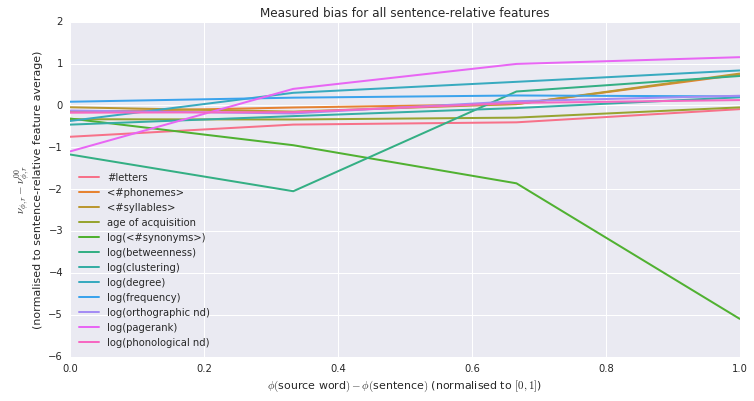

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

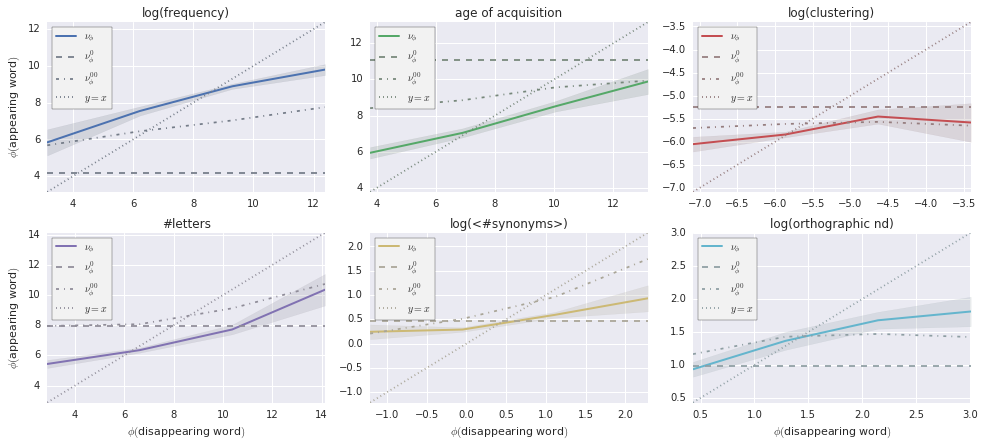

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

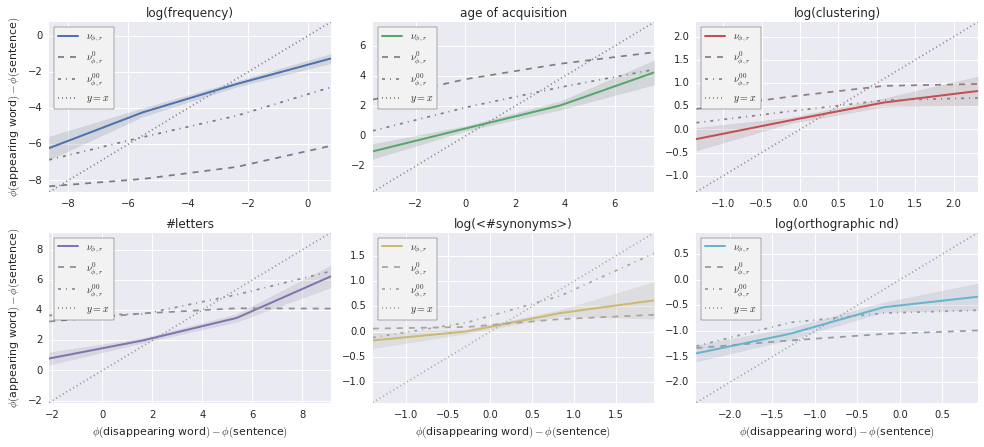

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

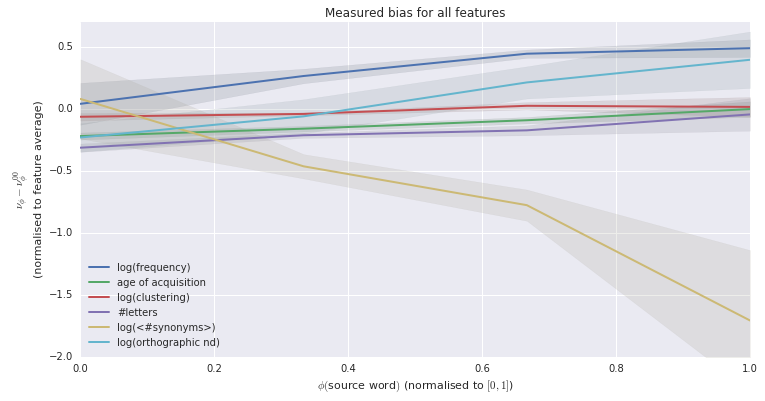

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

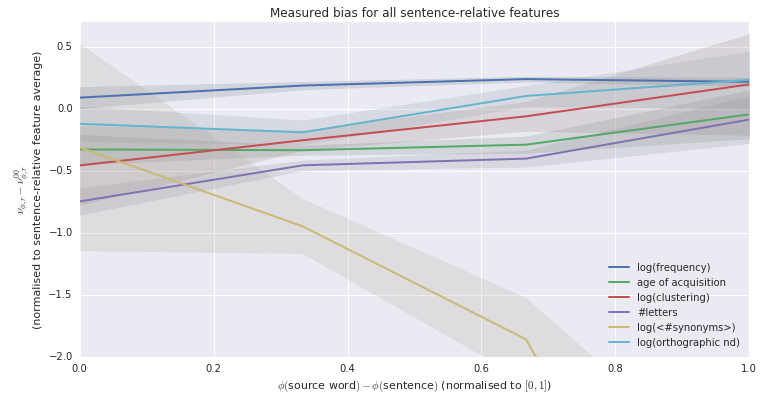

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


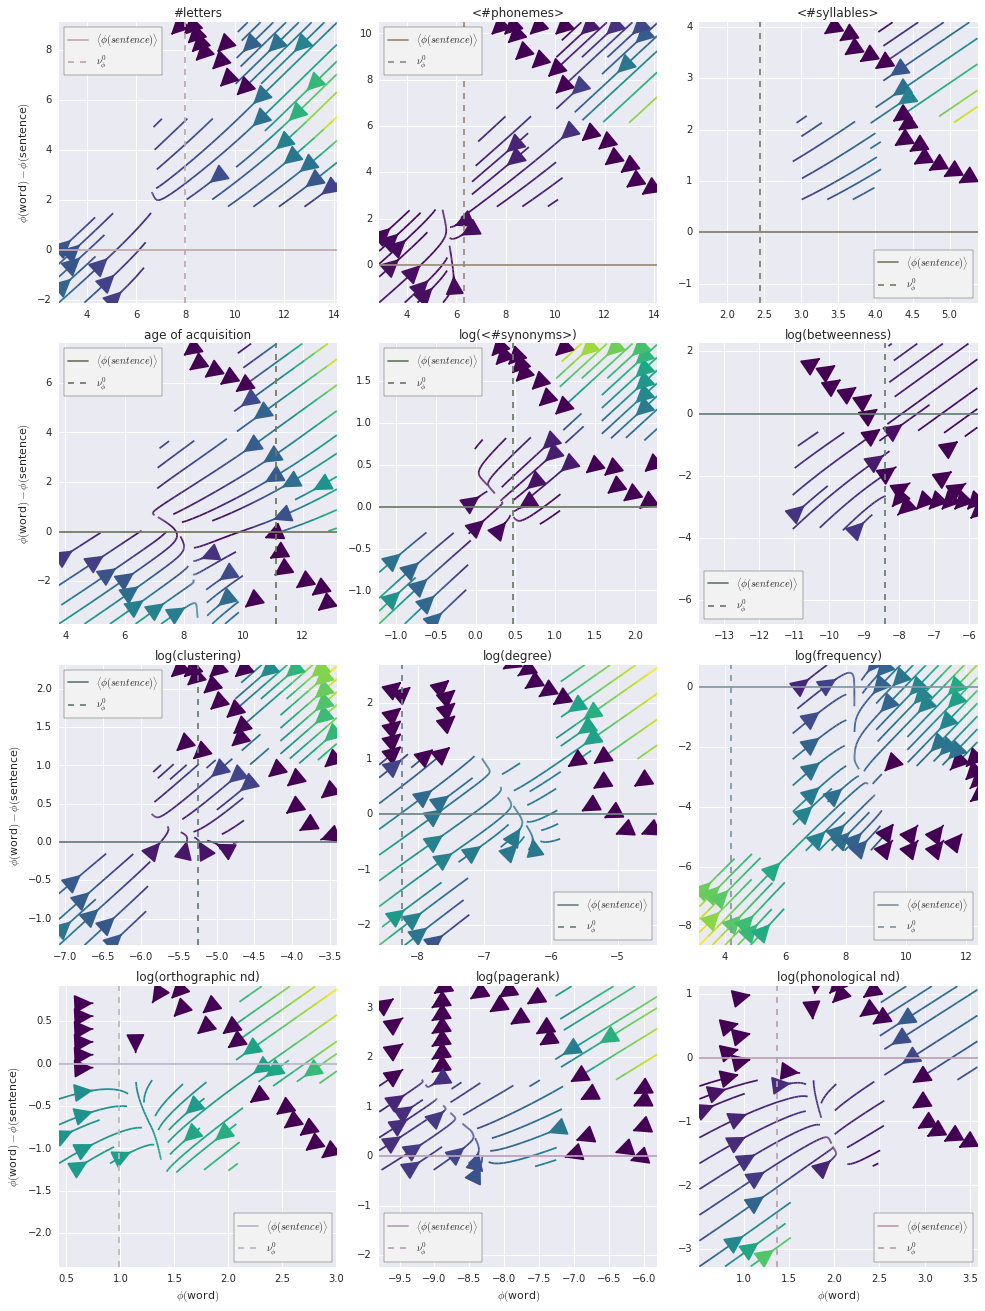

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


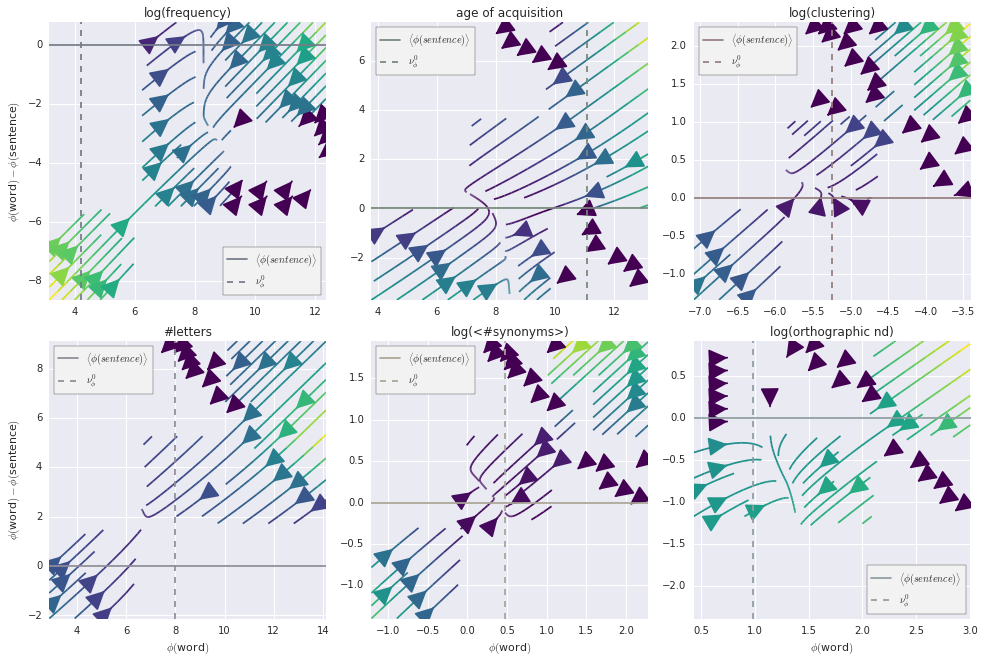

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54743007  0.1815631   0.06949607  0.06647386  0.0329916   0.02990698
  0.01849154  0.01721601  0.01561702  0.00894338]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.506190,-0.253305,0.082632,-0.231673,-0.220686,0.437881,-0.206990,-0.265221,0.407583,-0.271696,0.159791,-0.001494
Component-1,-0.375652,0.365293,-0.133559,0.280837,0.261398,0.426784,-0.170231,0.277623,0.432527,-0.241386,0.163245,-0.014737
Component-2,0.435995,0.592005,-0.058498,0.225676,-0.557965,-0.079791,0.027447,0.286844,-0.000782,0.045188,-0.046813,-0.011310


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 11223) |           | Elapsed Time: 0:01:00 ETA:  7 days, 21:08:43

  0% (   72 of 11223) |                    | Elapsed Time: 0:01:01 ETA:  0:01:37

  1% (  141 of 11223) |                    | Elapsed Time: 0:01:02 ETA:  0:01:31

  2% (  231 of 11223) |                    | Elapsed Time: 0:01:03 ETA:  0:01:19

  2% (  281 of 11223) |                    | Elapsed Time: 0:01:04 ETA:  0:01:15

  3% (  359 of 11223) |                    | Elapsed Time: 0:01:05 ETA:  0:01:15

  3% (  421 of 11223) |                    | Elapsed Time: 0:01:05 ETA:  0:01:14

  4% (  504 of 11223) |                    | Elapsed Time: 0:01:06 ETA:  0:01:12

  5% (  562 of 11223) |#                   | Elapsed Time: 0:01:07 ETA:  0:01:12

  5% (  630 of 11223) |#                   | Elapsed Time: 0:01:08 ETA:  0:01:14

  6% (  702 of 11223) |#                   | Elapsed Time: 0:01:09 ETA:  0:01:08

  6% (  780 of 11223) |#                   | Elapsed Time: 0:01:10 ETA:  0:01:07

  7% (  842 of 11223) |#                   | Elapsed Time: 0:01:11 ETA:  0:01:10

  8% (  909 of 11223) |#                   | Elapsed Time: 0:01:12 ETA:  0:01:14

  8% (  983 of 11223) |#                   | Elapsed Time: 0:01:13 ETA:  0:01:11

  9% ( 1078 of 11223) |#                   | Elapsed Time: 0:01:14 ETA:  0:01:07

 10% ( 1123 of 11223) |##                  | Elapsed Time: 0:01:14 ETA:  0:01:10

 10% ( 1196 of 11223) |##                  | Elapsed Time: 0:01:15 ETA:  0:01:11

 11% ( 1263 of 11223) |##                  | Elapsed Time: 0:01:16 ETA:  0:01:05

 12% ( 1347 of 11223) |##                  | Elapsed Time: 0:01:17 ETA:  0:01:05

 12% ( 1403 of 11223) |##                  | Elapsed Time: 0:01:18 ETA:  0:01:02

 13% ( 1475 of 11223) |##                  | Elapsed Time: 0:01:19 ETA:  0:01:01

 13% ( 1544 of 11223) |##                  | Elapsed Time: 0:01:20 ETA:  0:00:56

 14% ( 1628 of 11223) |##                  | Elapsed Time: 0:01:21 ETA:  0:00:56

 15% ( 1684 of 11223) |###                 | Elapsed Time: 0:01:21 ETA:  0:00:58

 15% ( 1767 of 11223) |###                 | Elapsed Time: 0:01:22 ETA:  0:00:54

 16% ( 1824 of 11223) |###                 | Elapsed Time: 0:01:23 ETA:  0:00:53

 16% ( 1905 of 11223) |###                 | Elapsed Time: 0:01:24 ETA:  0:00:53

 17% ( 1965 of 11223) |###                 | Elapsed Time: 0:01:25 ETA:  0:00:52

 18% ( 2056 of 11223) |###                 | Elapsed Time: 0:01:26 ETA:  0:00:51

 18% ( 2105 of 11223) |###                 | Elapsed Time: 0:01:26 ETA:  0:00:48

 19% ( 2190 of 11223) |###                 | Elapsed Time: 0:01:27 ETA:  0:00:47

 20% ( 2245 of 11223) |####                | Elapsed Time: 0:01:28 ETA:  0:00:48

 20% ( 2316 of 11223) |####                | Elapsed Time: 0:01:29 ETA:  0:00:49

 21% ( 2385 of 11223) |####                | Elapsed Time: 0:01:30 ETA:  0:00:49

 21% ( 2452 of 11223) |####                | Elapsed Time: 0:01:31 ETA:  0:00:50

 22% ( 2526 of 11223) |####                | Elapsed Time: 0:01:32 ETA:  0:00:47

 23% ( 2618 of 11223) |####                | Elapsed Time: 0:01:33 ETA:  0:00:45

 23% ( 2666 of 11223) |####                | Elapsed Time: 0:01:33 ETA:  0:00:46

 24% ( 2755 of 11223) |####                | Elapsed Time: 0:01:34 ETA:  0:00:44

 25% ( 2806 of 11223) |#####               | Elapsed Time: 0:01:35 ETA:  0:00:45

 25% ( 2877 of 11223) |#####               | Elapsed Time: 0:01:36 ETA:  0:00:44

 26% ( 2947 of 11223) |#####               | Elapsed Time: 0:01:37 ETA:  0:00:39

 27% ( 3045 of 11223) |#####               | Elapsed Time: 0:01:38 ETA:  0:00:34

 27% ( 3087 of 11223) |#####               | Elapsed Time: 0:01:38 ETA:  0:00:30

 28% ( 3160 of 11223) |#####               | Elapsed Time: 0:01:39 ETA:  0:00:32

 28% ( 3227 of 11223) |#####               | Elapsed Time: 0:01:40 ETA:  0:00:32

 29% ( 3317 of 11223) |#####               | Elapsed Time: 0:01:41 ETA:  0:00:30

 30% ( 3367 of 11223) |######              | Elapsed Time: 0:01:42 ETA:  0:00:31

 30% ( 3442 of 11223) |######              | Elapsed Time: 0:01:43 ETA:  0:00:31

 31% ( 3508 of 11223) |######              | Elapsed Time: 0:01:44 ETA:  0:00:27

 31% ( 3587 of 11223) |######              | Elapsed Time: 0:01:45 ETA:  0:00:29

 32% ( 3648 of 11223) |######              | Elapsed Time: 0:01:45 ETA:  0:00:32

 33% ( 3725 of 11223) |######              | Elapsed Time: 0:01:46 ETA:  0:00:32

 33% ( 3788 of 11223) |######              | Elapsed Time: 0:01:47 ETA:  0:00:30

 34% ( 3874 of 11223) |######              | Elapsed Time: 0:01:48 ETA:  0:00:30

 35% ( 3929 of 11223) |#######             | Elapsed Time: 0:01:49 ETA:  0:00:32

 35% ( 4011 of 11223) |#######             | Elapsed Time: 0:01:50 ETA:  0:00:30

 36% ( 4069 of 11223) |#######             | Elapsed Time: 0:01:50 ETA:  0:00:27

 37% ( 4153 of 11223) |#######             | Elapsed Time: 0:01:51 ETA:  0:00:26

 37% ( 4209 of 11223) |#######             | Elapsed Time: 0:01:53 ETA:  0:00:32

 38% ( 4273 of 11223) |#######             | Elapsed Time: 0:01:54 ETA:  0:00:34

 38% ( 4349 of 11223) |#######             | Elapsed Time: 0:01:54 ETA:  0:00:32

 39% ( 4414 of 11223) |#######             | Elapsed Time: 0:01:55 ETA:  0:00:37

 40% ( 4490 of 11223) |########            | Elapsed Time: 0:01:56 ETA:  0:00:34

 40% ( 4577 of 11223) |########            | Elapsed Time: 0:01:57 ETA:  0:00:32

 41% ( 4630 of 11223) |########            | Elapsed Time: 0:01:58 ETA:  0:00:33

 41% ( 4710 of 11223) |########            | Elapsed Time: 0:01:59 ETA:  0:00:33

 42% ( 4770 of 11223) |########            | Elapsed Time: 0:02:00 ETA:  0:00:27

 43% ( 4843 of 11223) |########            | Elapsed Time: 0:02:01 ETA:  0:00:26

 43% ( 4911 of 11223) |########            | Elapsed Time: 0:02:02 ETA:  0:00:22

 44% ( 4985 of 11223) |########            | Elapsed Time: 0:02:03 ETA:  0:00:22

 45% ( 5051 of 11223) |#########           | Elapsed Time: 0:02:04 ETA:  0:00:19

 45% ( 5117 of 11223) |#########           | Elapsed Time: 0:02:05 ETA:  0:00:21

 46% ( 5191 of 11223) |#########           | Elapsed Time: 0:02:06 ETA:  0:00:26

 47% ( 5276 of 11223) |#########           | Elapsed Time: 0:02:07 ETA:  0:00:23

 47% ( 5331 of 11223) |#########           | Elapsed Time: 0:02:07 ETA:  0:00:20

 48% ( 5414 of 11223) |#########           | Elapsed Time: 0:02:08 ETA:  0:00:17

 48% ( 5472 of 11223) |#########           | Elapsed Time: 0:02:09 ETA:  0:00:14

 49% ( 5543 of 11223) |#########           | Elapsed Time: 0:02:10 ETA:  0:00:14

 50% ( 5612 of 11223) |##########          | Elapsed Time: 0:02:11 ETA:  0:00:13

 50% ( 5704 of 11223) |##########          | Elapsed Time: 0:02:12 ETA:  0:00:06

 51% ( 5752 of 11223) |##########          | Elapsed Time: 0:02:12 ETA:  0:00:02

 51% ( 5828 of 11223) |##########          | Elapsed Time: 0:02:13 ETA:  0:00:03

 52% ( 5893 of 11223) |##########          | Elapsed Time: 0:02:14 ETA:  0:00:01

 53% ( 5950 of 11223) |##########          | Elapsed Time: 0:02:15 ETA:  0:00:07

 53% ( 6033 of 11223) |##########          | Elapsed Time: 0:02:16 ETA:  0:00:10

 54% ( 6116 of 11223) |##########          | Elapsed Time: 0:02:17 ETA:  0:00:06

 55% ( 6173 of 11223) |###########         | Elapsed Time: 0:02:18 ETA:  0:00:07

 55% ( 6247 of 11223) |###########         | Elapsed Time: 0:02:19 ETA:  0:00:11

 56% ( 6313 of 11223) |###########         | Elapsed Time: 0:02:20 ETA:  0:00:08

 57% ( 6403 of 11223) |###########         | Elapsed Time: 0:02:21 ETA:  0:00:04

 57% ( 6454 of 11223) |###########         | Elapsed Time: 0:02:22 ETA:  0:00:06

 58% ( 6534 of 11223) |###########         | Elapsed Time: 0:02:23 ETA:  0:00:00

 58% ( 6594 of 11223) |###########         | Elapsed Time: 0:02:23 ETA:  0:00:00

 59% ( 6682 of 11223) |###########         | Elapsed Time: 0:02:24 ETA:  0:00:00

 60% ( 6734 of 11223) |############        | Elapsed Time: 0:02:25 ETA:  0:00:00

 60% ( 6826 of 11223) |############        | Elapsed Time: 0:02:26 ETA:  0:00:00

 61% ( 6875 of 11223) |############        | Elapsed Time: 0:02:27 ETA:  0:00:00

 61% ( 6940 of 11223) |############        | Elapsed Time: 0:02:28 ETA:  0:00:00

 62% ( 7015 of 11223) |############        | Elapsed Time: 0:02:29 ETA:  0:00:00

 63% ( 7098 of 11223) |############        | Elapsed Time: 0:02:30 ETA:  0:00:00

 63% ( 7155 of 11223) |############        | Elapsed Time: 0:02:30 ETA:  0:00:00

 64% ( 7236 of 11223) |############        | Elapsed Time: 0:02:31 ETA:  0:00:00

 65% ( 7295 of 11223) |#############       | Elapsed Time: 0:02:32 ETA:  0:00:00

 65% ( 7380 of 11223) |#############       | Elapsed Time: 0:02:33 ETA:  0:00:00

 66% ( 7436 of 11223) |#############       | Elapsed Time: 0:02:34 ETA:  0:00:00

 67% ( 7520 of 11223) |#############       | Elapsed Time: 0:02:35 ETA:  0:00:00

 67% ( 7576 of 11223) |#############       | Elapsed Time: 0:02:36 ETA:  0:00:00

 68% ( 7666 of 11223) |#############       | Elapsed Time: 0:02:37 ETA:  0:00:00

 68% ( 7716 of 11223) |#############       | Elapsed Time: 0:02:37 ETA:  0:00:00

 69% ( 7811 of 11223) |#############       | Elapsed Time: 0:02:38 ETA:  0:00:00

 70% ( 7857 of 11223) |##############      | Elapsed Time: 0:02:39 ETA:  0:00:00

 70% ( 7933 of 11223) |##############      | Elapsed Time: 0:02:40 ETA:  0:00:00

 71% ( 7997 of 11223) |##############      | Elapsed Time: 0:02:40 ETA:  0:00:00

 72% ( 8085 of 11223) |##############      | Elapsed Time: 0:02:41 ETA:  0:00:00

 72% ( 8137 of 11223) |##############      | Elapsed Time: 0:02:42 ETA:  0:00:00

 73% ( 8211 of 11223) |##############      | Elapsed Time: 0:02:43 ETA:  0:00:00

 73% ( 8277 of 11223) |##############      | Elapsed Time: 0:02:44 ETA:  0:00:00

 74% ( 8370 of 11223) |##############      | Elapsed Time: 0:02:45 ETA:  0:00:00

 75% ( 8418 of 11223) |###############     | Elapsed Time: 0:02:46 ETA:  0:00:00

 75% ( 8503 of 11223) |###############     | Elapsed Time: 0:02:47 ETA:  0:00:00

 76% ( 8558 of 11223) |###############     | Elapsed Time: 0:02:47 ETA:  0:00:00

 77% ( 8647 of 11223) |###############     | Elapsed Time: 0:02:48 ETA:  0:00:00

 77% ( 8698 of 11223) |###############     | Elapsed Time: 0:02:49 ETA:  0:00:00

 78% ( 8798 of 11223) |###############     | Elapsed Time: 0:02:50 ETA:  0:00:00

 78% ( 8839 of 11223) |###############     | Elapsed Time: 0:02:50 ETA:  0:00:00

 79% ( 8931 of 11223) |###############     | Elapsed Time: 0:02:51 ETA:  0:00:00

 80% ( 8979 of 11223) |################    | Elapsed Time: 0:02:52 ETA:  0:00:00

 80% ( 9062 of 11223) |################    | Elapsed Time: 0:02:53 ETA:  0:00:00

 81% ( 9119 of 11223) |################    | Elapsed Time: 0:02:54 ETA:  0:00:00

 81% ( 9176 of 11223) |################    | Elapsed Time: 0:02:55 ETA:  0:00:00

 82% ( 9259 of 11223) |################    | Elapsed Time: 0:02:56 ETA:  0:00:00

 83% ( 9332 of 11223) |################    | Elapsed Time: 0:02:57 ETA:  0:00:00

 83% ( 9400 of 11223) |################    | Elapsed Time: 0:02:57 ETA:  0:00:00

 84% ( 9474 of 11223) |################    | Elapsed Time: 0:02:58 ETA:  0:00:00

 85% ( 9540 of 11223) |#################   | Elapsed Time: 0:02:59 ETA:  0:00:00

 85% ( 9612 of 11223) |#################   | Elapsed Time: 0:03:00 ETA:  0:00:00

 86% ( 9680 of 11223) |#################   | Elapsed Time: 0:03:01 ETA:  0:00:00

 87% ( 9767 of 11223) |#################   | Elapsed Time: 0:03:02 ETA:  0:00:00

 87% ( 9821 of 11223) |#################   | Elapsed Time: 0:03:03 ETA:  0:00:00

 88% ( 9914 of 11223) |#################   | Elapsed Time: 0:03:04 ETA:  0:00:00

 88% ( 9961 of 11223) |#################   | Elapsed Time: 0:03:04 ETA:  0:00:00

 89% (10055 of 11223) |#################   | Elapsed Time: 0:03:05 ETA:  0:00:00

 90% (10101 of 11223) |##################  | Elapsed Time: 0:03:06 ETA:  0:00:00

 90% (10188 of 11223) |##################  | Elapsed Time: 0:03:07 ETA:  0:00:00

 91% (10241 of 11223) |##################  | Elapsed Time: 0:03:07 ETA:  0:00:00

 92% (10326 of 11223) |##################  | Elapsed Time: 0:03:08 ETA:  0:00:00

 92% (10382 of 11223) |##################  | Elapsed Time: 0:03:09 ETA:  0:00:00

 93% (10473 of 11223) |##################  | Elapsed Time: 0:03:10 ETA:  0:00:00

 93% (10522 of 11223) |##################  | Elapsed Time: 0:03:11 ETA:  0:00:00

 94% (10604 of 11223) |##################  | Elapsed Time: 0:03:12 ETA:  0:00:00

 95% (10662 of 11223) |################### | Elapsed Time: 0:03:12 ETA:  0:00:00

 95% (10741 of 11223) |################### | Elapsed Time: 0:03:13 ETA:  0:00:00

 96% (10803 of 11223) |################### | Elapsed Time: 0:03:14 ETA:  0:00:00

 97% (10892 of 11223) |################### | Elapsed Time: 0:03:15 ETA:  0:00:00

 97% (10943 of 11223) |################### | Elapsed Time: 0:03:16 ETA:  0:00:00

 98% (11025 of 11223) |################### | Elapsed Time: 0:03:17 ETA:  0:00:00

 98% (11083 of 11223) |################### | Elapsed Time: 0:03:18 ETA:  0:00:00

 99% (11178 of 11223) |################### | Elapsed Time: 0:03:19 ETA:  0:00:00

100% (11223 of 11223) |####################| Elapsed Time: 0:03:19 Time: 0:03:19


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

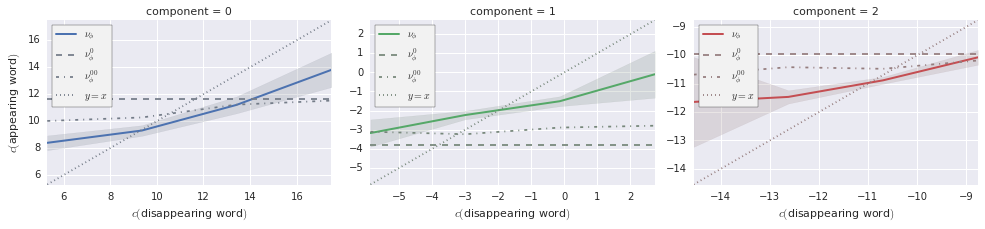

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.58784706  0.18501573  0.12482658]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,0.728439,0.108509,-0.321281,0.536449,-0.258074,-0.000197
Component-1,-0.414396,-0.131541,0.454055,0.717790,-0.298178,-0.025989
Component-2,0.537100,-0.096763,0.809450,-0.202438,0.046881,-0.061418


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 11223) |            | Elapsed Time: 0:00:17 ETA:  2 days, 6:23:32

  0% (   82 of 11223) |                    | Elapsed Time: 0:00:18 ETA:  0:02:01

  1% (  141 of 11223) |                    | Elapsed Time: 0:00:19 ETA:  0:01:57

  2% (  234 of 11223) |                    | Elapsed Time: 0:00:20 ETA:  0:01:51

  2% (  281 of 11223) |                    | Elapsed Time: 0:00:20 ETA:  0:01:49

  3% (  366 of 11223) |                    | Elapsed Time: 0:00:21 ETA:  0:01:49

  3% (  421 of 11223) |                    | Elapsed Time: 0:00:22 ETA:  0:01:48

  4% (  501 of 11223) |                    | Elapsed Time: 0:00:23 ETA:  0:01:49

  5% (  562 of 11223) |#                   | Elapsed Time: 0:00:24 ETA:  0:01:48

  5% (  639 of 11223) |#                   | Elapsed Time: 0:00:25 ETA:  0:01:49

  6% (  702 of 11223) |#                   | Elapsed Time: 0:00:25 ETA:  0:01:46

  6% (  785 of 11223) |#                   | Elapsed Time: 0:00:26 ETA:  0:01:45

  7% (  842 of 11223) |#                   | Elapsed Time: 0:00:27 ETA:  0:01:47

  8% (  921 of 11223) |#                   | Elapsed Time: 0:00:28 ETA:  0:01:48

  8% (  983 of 11223) |#                   | Elapsed Time: 0:00:29 ETA:  0:01:46

  9% ( 1081 of 11223) |#                   | Elapsed Time: 0:00:30 ETA:  0:01:42

 10% ( 1123 of 11223) |##                  | Elapsed Time: 0:00:30 ETA:  0:01:43

 10% ( 1202 of 11223) |##                  | Elapsed Time: 0:00:31 ETA:  0:01:43

 11% ( 1263 of 11223) |##                  | Elapsed Time: 0:00:32 ETA:  0:01:40

 12% ( 1351 of 11223) |##                  | Elapsed Time: 0:00:33 ETA:  0:01:40

 12% ( 1403 of 11223) |##                  | Elapsed Time: 0:00:34 ETA:  0:01:37

 13% ( 1489 of 11223) |##                  | Elapsed Time: 0:00:35 ETA:  0:01:35

 13% ( 1544 of 11223) |##                  | Elapsed Time: 0:00:35 ETA:  0:01:31

 14% ( 1630 of 11223) |##                  | Elapsed Time: 0:00:36 ETA:  0:01:32

 15% ( 1684 of 11223) |###                 | Elapsed Time: 0:00:37 ETA:  0:01:33

 15% ( 1771 of 11223) |###                 | Elapsed Time: 0:00:38 ETA:  0:01:29

 16% ( 1824 of 11223) |###                 | Elapsed Time: 0:00:38 ETA:  0:01:28

 17% ( 1911 of 11223) |###                 | Elapsed Time: 0:00:39 ETA:  0:01:27

 17% ( 1965 of 11223) |###                 | Elapsed Time: 0:00:40 ETA:  0:01:26

 18% ( 2057 of 11223) |###                 | Elapsed Time: 0:00:41 ETA:  0:01:25

 18% ( 2105 of 11223) |###                 | Elapsed Time: 0:00:42 ETA:  0:01:24

 19% ( 2194 of 11223) |###                 | Elapsed Time: 0:00:43 ETA:  0:01:25

 20% ( 2245 of 11223) |####                | Elapsed Time: 0:00:43 ETA:  0:01:25

 20% ( 2331 of 11223) |####                | Elapsed Time: 0:00:44 ETA:  0:01:25

 21% ( 2385 of 11223) |####                | Elapsed Time: 0:00:45 ETA:  0:01:23

 22% ( 2470 of 11223) |####                | Elapsed Time: 0:00:46 ETA:  0:01:22

 22% ( 2526 of 11223) |####                | Elapsed Time: 0:00:46 ETA:  0:01:21

 23% ( 2619 of 11223) |####                | Elapsed Time: 0:00:47 ETA:  0:01:19

 23% ( 2666 of 11223) |####                | Elapsed Time: 0:00:48 ETA:  0:01:19

 24% ( 2756 of 11223) |####                | Elapsed Time: 0:00:49 ETA:  0:01:17

 25% ( 2806 of 11223) |#####               | Elapsed Time: 0:00:49 ETA:  0:01:17

 25% ( 2892 of 11223) |#####               | Elapsed Time: 0:00:50 ETA:  0:01:15

 26% ( 2947 of 11223) |#####               | Elapsed Time: 0:00:51 ETA:  0:01:13

 27% ( 3052 of 11223) |#####               | Elapsed Time: 0:00:52 ETA:  0:01:10

 27% ( 3087 of 11223) |#####               | Elapsed Time: 0:00:52 ETA:  0:01:08

 28% ( 3174 of 11223) |#####               | Elapsed Time: 0:00:53 ETA:  0:01:08

 28% ( 3227 of 11223) |#####               | Elapsed Time: 0:00:54 ETA:  0:01:07

 29% ( 3323 of 11223) |#####               | Elapsed Time: 0:00:55 ETA:  0:01:06

 30% ( 3367 of 11223) |######              | Elapsed Time: 0:00:55 ETA:  0:01:05

 30% ( 3453 of 11223) |######              | Elapsed Time: 0:00:56 ETA:  0:01:04

 31% ( 3508 of 11223) |######              | Elapsed Time: 0:00:57 ETA:  0:01:02

 32% ( 3596 of 11223) |######              | Elapsed Time: 0:00:58 ETA:  0:01:03

 32% ( 3648 of 11223) |######              | Elapsed Time: 0:00:59 ETA:  0:01:05

 33% ( 3733 of 11223) |######              | Elapsed Time: 0:01:00 ETA:  0:01:05

 33% ( 3788 of 11223) |######              | Elapsed Time: 0:01:00 ETA:  0:01:04

 34% ( 3881 of 11223) |######              | Elapsed Time: 0:01:01 ETA:  0:01:03

 35% ( 3929 of 11223) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:05

 35% ( 4019 of 11223) |#######             | Elapsed Time: 0:01:03 ETA:  0:01:04

 36% ( 4069 of 11223) |#######             | Elapsed Time: 0:01:03 ETA:  0:01:01

 37% ( 4161 of 11223) |#######             | Elapsed Time: 0:01:04 ETA:  0:01:00

 37% ( 4209 of 11223) |#######             | Elapsed Time: 0:01:05 ETA:  0:01:03

 38% ( 4285 of 11223) |#######             | Elapsed Time: 0:01:06 ETA:  0:01:06

 38% ( 4349 of 11223) |#######             | Elapsed Time: 0:01:07 ETA:  0:01:05

 39% ( 4430 of 11223) |#######             | Elapsed Time: 0:01:08 ETA:  0:01:04

 40% ( 4490 of 11223) |########            | Elapsed Time: 0:01:09 ETA:  0:01:04

 40% ( 4587 of 11223) |########            | Elapsed Time: 0:01:10 ETA:  0:01:01

 41% ( 4630 of 11223) |########            | Elapsed Time: 0:01:10 ETA:  0:01:00

 42% ( 4720 of 11223) |########            | Elapsed Time: 0:01:11 ETA:  0:01:00

 42% ( 4770 of 11223) |########            | Elapsed Time: 0:01:12 ETA:  0:01:01

 43% ( 4848 of 11223) |########            | Elapsed Time: 0:01:13 ETA:  0:00:58

 43% ( 4911 of 11223) |########            | Elapsed Time: 0:01:13 ETA:  0:00:54

 44% ( 5000 of 11223) |########            | Elapsed Time: 0:01:14 ETA:  0:00:53

 45% ( 5051 of 11223) |#########           | Elapsed Time: 0:01:15 ETA:  0:00:51

 45% ( 5124 of 11223) |#########           | Elapsed Time: 0:01:16 ETA:  0:00:54

 46% ( 5191 of 11223) |#########           | Elapsed Time: 0:01:17 ETA:  0:00:55

 47% ( 5285 of 11223) |#########           | Elapsed Time: 0:01:18 ETA:  0:00:53

 47% ( 5331 of 11223) |#########           | Elapsed Time: 0:01:18 ETA:  0:00:52

 48% ( 5419 of 11223) |#########           | Elapsed Time: 0:01:19 ETA:  0:00:50

 48% ( 5472 of 11223) |#########           | Elapsed Time: 0:01:20 ETA:  0:00:46

 49% ( 5551 of 11223) |#########           | Elapsed Time: 0:01:21 ETA:  0:00:47

 50% ( 5612 of 11223) |##########          | Elapsed Time: 0:01:21 ETA:  0:00:47

 50% ( 5712 of 11223) |##########          | Elapsed Time: 0:01:22 ETA:  0:00:43

 51% ( 5752 of 11223) |##########          | Elapsed Time: 0:01:23 ETA:  0:00:38

 52% ( 5837 of 11223) |##########          | Elapsed Time: 0:01:24 ETA:  0:00:39

 52% ( 5893 of 11223) |##########          | Elapsed Time: 0:01:24 ETA:  0:00:37

 53% ( 5964 of 11223) |##########          | Elapsed Time: 0:01:25 ETA:  0:00:41

 53% ( 6033 of 11223) |##########          | Elapsed Time: 0:01:26 ETA:  0:00:40

 54% ( 6124 of 11223) |##########          | Elapsed Time: 0:01:27 ETA:  0:00:41

 55% ( 6173 of 11223) |###########         | Elapsed Time: 0:01:28 ETA:  0:00:40

 55% ( 6252 of 11223) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:40

 56% ( 6313 of 11223) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:42

 57% ( 6408 of 11223) |###########         | Elapsed Time: 0:01:30 ETA:  0:00:40

 57% ( 6454 of 11223) |###########         | Elapsed Time: 0:01:31 ETA:  0:00:39

 58% ( 6541 of 11223) |###########         | Elapsed Time: 0:01:32 ETA:  0:00:40

 58% ( 6594 of 11223) |###########         | Elapsed Time: 0:01:33 ETA:  0:00:35

 59% ( 6685 of 11223) |###########         | Elapsed Time: 0:01:34 ETA:  0:00:33

 60% ( 6734 of 11223) |############        | Elapsed Time: 0:01:34 ETA:  0:00:34

 60% ( 6824 of 11223) |############        | Elapsed Time: 0:01:35 ETA:  0:00:31

 61% ( 6875 of 11223) |############        | Elapsed Time: 0:01:36 ETA:  0:00:29

 61% ( 6948 of 11223) |############        | Elapsed Time: 0:01:37 ETA:  0:00:32

 62% ( 7015 of 11223) |############        | Elapsed Time: 0:01:38 ETA:  0:00:34

 63% ( 7111 of 11223) |############        | Elapsed Time: 0:01:39 ETA:  0:00:31

 63% ( 7155 of 11223) |############        | Elapsed Time: 0:01:39 ETA:  0:00:29

 64% ( 7246 of 11223) |############        | Elapsed Time: 0:01:40 ETA:  0:00:28

 65% ( 7295 of 11223) |#############       | Elapsed Time: 0:01:41 ETA:  0:00:29

 65% ( 7392 of 11223) |#############       | Elapsed Time: 0:01:42 ETA:  0:00:25

 66% ( 7436 of 11223) |#############       | Elapsed Time: 0:01:42 ETA:  0:00:24

 67% ( 7527 of 11223) |#############       | Elapsed Time: 0:01:43 ETA:  0:00:22

 67% ( 7576 of 11223) |#############       | Elapsed Time: 0:01:44 ETA:  0:00:18

 68% ( 7667 of 11223) |#############       | Elapsed Time: 0:01:45 ETA:  0:00:16

 68% ( 7716 of 11223) |#############       | Elapsed Time: 0:01:45 ETA:  0:00:16

 69% ( 7816 of 11223) |#############       | Elapsed Time: 0:01:46 ETA:  0:00:14

 70% ( 7857 of 11223) |##############      | Elapsed Time: 0:01:47 ETA:  0:00:14

 70% ( 7943 of 11223) |##############      | Elapsed Time: 0:01:48 ETA:  0:00:13

 71% ( 7997 of 11223) |##############      | Elapsed Time: 0:01:48 ETA:  0:00:13

 72% ( 8098 of 11223) |##############      | Elapsed Time: 0:01:49 ETA:  0:00:11

 72% ( 8137 of 11223) |##############      | Elapsed Time: 0:01:50 ETA:  0:00:10

 73% ( 8229 of 11223) |##############      | Elapsed Time: 0:01:51 ETA:  0:00:09

 73% ( 8277 of 11223) |##############      | Elapsed Time: 0:01:51 ETA:  0:00:10

 74% ( 8376 of 11223) |##############      | Elapsed Time: 0:01:52 ETA:  0:00:08

 75% ( 8418 of 11223) |###############     | Elapsed Time: 0:01:53 ETA:  0:00:09

 75% ( 8506 of 11223) |###############     | Elapsed Time: 0:01:54 ETA:  0:00:08

 76% ( 8558 of 11223) |###############     | Elapsed Time: 0:01:54 ETA:  0:00:08

 77% ( 8651 of 11223) |###############     | Elapsed Time: 0:01:55 ETA:  0:00:07

 77% ( 8698 of 11223) |###############     | Elapsed Time: 0:01:56 ETA:  0:00:07

 78% ( 8805 of 11223) |###############     | Elapsed Time: 0:01:57 ETA:  0:00:03

 78% ( 8839 of 11223) |###############     | Elapsed Time: 0:01:57 ETA:  0:00:04

 79% ( 8934 of 11223) |###############     | Elapsed Time: 0:01:58 ETA:  0:00:01

 80% ( 8979 of 11223) |################    | Elapsed Time: 0:01:59 ETA:  0:00:00

 80% ( 9068 of 11223) |################    | Elapsed Time: 0:02:00 ETA:  0:00:00

 81% ( 9119 of 11223) |################    | Elapsed Time: 0:02:00 ETA:  0:00:00

 81% ( 9191 of 11223) |################    | Elapsed Time: 0:02:01 ETA:  0:00:01

 82% ( 9259 of 11223) |################    | Elapsed Time: 0:02:02 ETA:  0:00:01

 83% ( 9344 of 11223) |################    | Elapsed Time: 0:02:03 ETA:  0:00:02

 83% ( 9400 of 11223) |################    | Elapsed Time: 0:02:04 ETA:  0:00:04

 84% ( 9488 of 11223) |################    | Elapsed Time: 0:02:05 ETA:  0:00:02

 85% ( 9540 of 11223) |#################   | Elapsed Time: 0:02:05 ETA:  0:00:02

 85% ( 9625 of 11223) |#################   | Elapsed Time: 0:02:06 ETA:  0:00:03

 86% ( 9680 of 11223) |#################   | Elapsed Time: 0:02:07 ETA:  0:00:01

 87% ( 9774 of 11223) |#################   | Elapsed Time: 0:02:08 ETA:  0:00:00

 87% ( 9821 of 11223) |#################   | Elapsed Time: 0:02:08 ETA:  0:00:00

 88% ( 9918 of 11223) |#################   | Elapsed Time: 0:02:09 ETA:  0:00:00

 88% ( 9961 of 11223) |#################   | Elapsed Time: 0:02:10 ETA:  0:00:00

 89% (10061 of 11223) |#################   | Elapsed Time: 0:02:11 ETA:  0:00:00

 90% (10101 of 11223) |##################  | Elapsed Time: 0:02:11 ETA:  0:00:00

 90% (10197 of 11223) |##################  | Elapsed Time: 0:02:12 ETA:  0:00:00

 91% (10241 of 11223) |##################  | Elapsed Time: 0:02:13 ETA:  0:00:00

 92% (10338 of 11223) |##################  | Elapsed Time: 0:02:14 ETA:  0:00:00

 92% (10382 of 11223) |##################  | Elapsed Time: 0:02:14 ETA:  0:00:00

 93% (10483 of 11223) |##################  | Elapsed Time: 0:02:15 ETA:  0:00:00

 93% (10522 of 11223) |##################  | Elapsed Time: 0:02:16 ETA:  0:00:00

 94% (10617 of 11223) |##################  | Elapsed Time: 0:02:17 ETA:  0:00:00

 95% (10662 of 11223) |################### | Elapsed Time: 0:02:17 ETA:  0:00:00

 95% (10756 of 11223) |################### | Elapsed Time: 0:02:18 ETA:  0:00:00

 96% (10803 of 11223) |################### | Elapsed Time: 0:02:19 ETA:  0:00:00

 97% (10903 of 11223) |################### | Elapsed Time: 0:02:20 ETA:  0:00:00

 97% (10943 of 11223) |################### | Elapsed Time: 0:02:20 ETA:  0:00:00

 98% (11030 of 11223) |################### | Elapsed Time: 0:02:21 ETA:  0:00:00

 98% (11083 of 11223) |################### | Elapsed Time: 0:02:22 ETA:  0:00:00

 99% (11183 of 11223) |################### | Elapsed Time: 0:02:23 ETA:  0:00:00

100% (11223 of 11223) |####################| Elapsed Time: 0:02:23 Time: 0:02:23


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

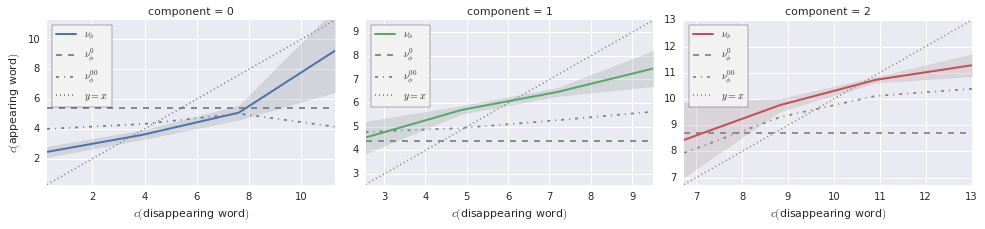

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1287 (cluster-unique) substitutions, but the PCA is in fact computed on 570 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.